<a href="https://colab.research.google.com/github/Amara-4312/CDC-predictive-modeling-2015/blob/main/Weighted_EDA_vs_Unweighted_EDA_CDC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================
# Exploratory Data Analysis (EDA) — BRFSS 2015 (Cleaned)
# =========================
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned dataset (from the cleaning step)
df = pd.read_csv("brfss2015_tidy.csv")

print("EDA on:", df.shape, "rows x", df.shape[1], "cols")


EDA on: (14460, 20) rows x 20 cols


In [ ]:
df.head()

,age,sex,education,income,employment,BMI,BMI_cat,ever_high_bp,ever_high_chol,any_exercise,ever_100_cigs,current_smoker,any_alcohol,diabetes_dx,prediabetes_dx,_LLCPWT,_WT2RAKE,_RAWRAKE,_STSTR,_PSU
0,63.0,Female,HS/GED,$15–20k,NaN,40.18,Obese,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
1,52.0,Female,College 4+,<$10k,Out of work >1y,25.09,Overweight,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,108.060903,28.781560,1.0,11011.0,2.015000e+09
2,71.0,Female,HS/GED,NaN,NaN,22.04,Normal,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,255.264797,57.563120,2.0,11011.0,2.015000e+09
3,63.0,Female,HS/GED,NaN,NaN,28.19,Overweight,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
4,61.0,Female,Some college,NaN,NaN,24.37,Normal,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,258.682223,57.563120,2.0,11011.0,2.015000e+09


diabetes_dx
0.0    11918
1.0     2159
NaN      383
Name: count, dtype: int64


/tmp/ipython-input-3449969279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes_dx", data=df, palette="Set2")


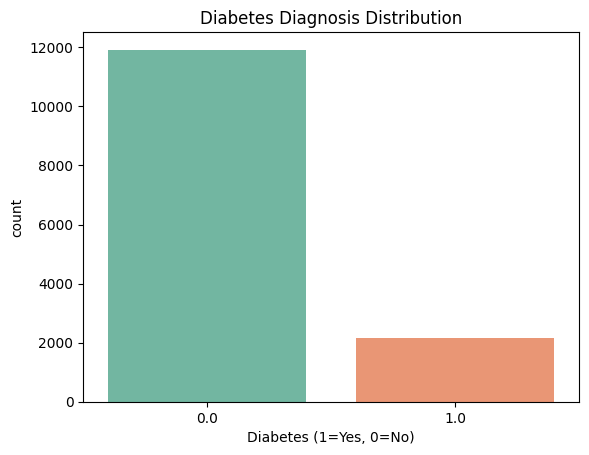

In [ ]:
# =========================
# Step 1 — Quick target audit
# =========================

if "diabetes_dx" in df.columns:
    print(df["diabetes_dx"].value_counts(dropna=False))
    sns.countplot(x="diabetes_dx", data=df, palette="Set2")
    plt.title("Diabetes Diagnosis Distribution")
    plt.xlabel("Diabetes (1=Yes, 0=No)")
    plt.show()


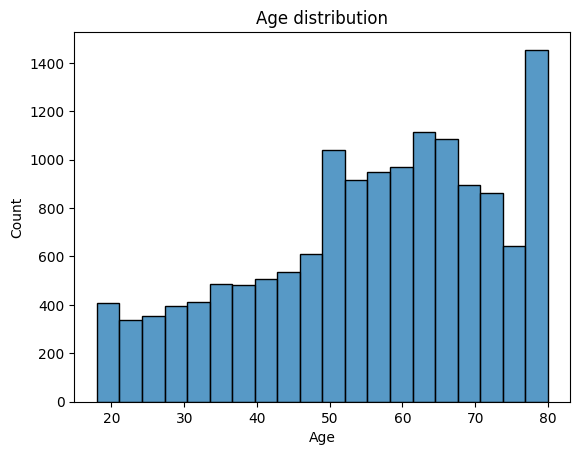

/tmp/ipython-input-3697718880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="pastel")


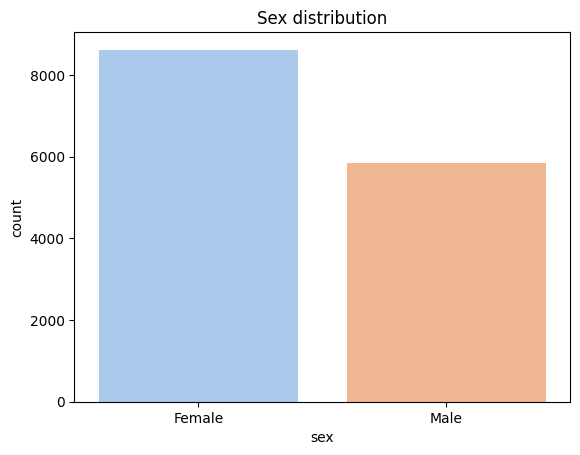

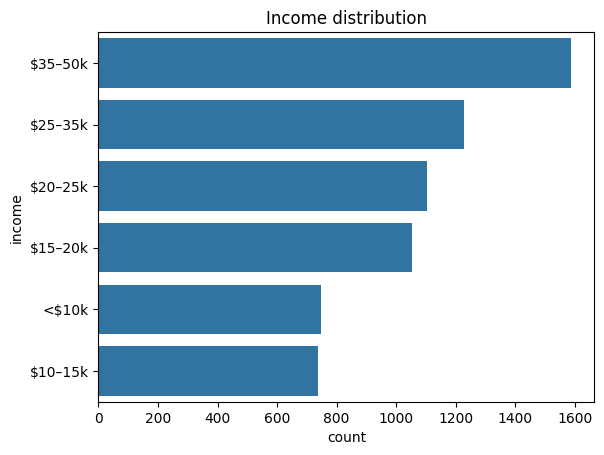

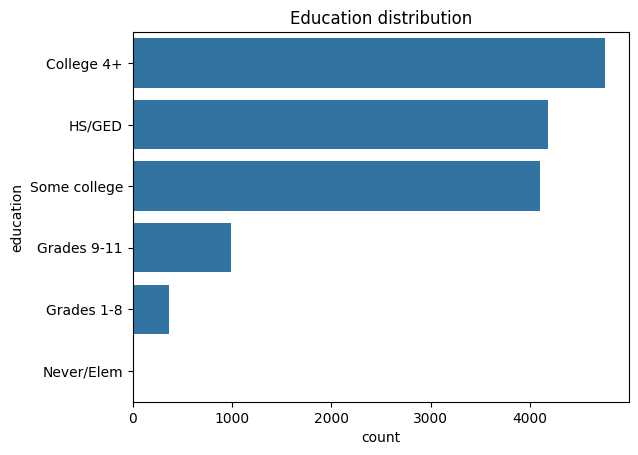

In [ ]:
# =========================
# Step 2 — Demographics
# =========================

# Age distribution
if "age" in df.columns:
    sns.histplot(df["age"].dropna(), bins=20, kde=False)
    plt.title("Age distribution")
    plt.xlabel("Age")
    plt.show()

# Sex
if "sex" in df.columns:
    sns.countplot(x="sex", data=df, palette="pastel")
    plt.title("Sex distribution")
    plt.show()

# Income
if "income" in df.columns:
    sns.countplot(y="income", data=df, order=df["income"].value_counts().index)
    plt.title("Income distribution")
    plt.show()

# Education
if "education" in df.columns:
    sns.countplot(y="education", data=df, order=df["education"].value_counts().index)
    plt.title("Education distribution")
    plt.show()


/tmp/ipython-input-1046154591.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


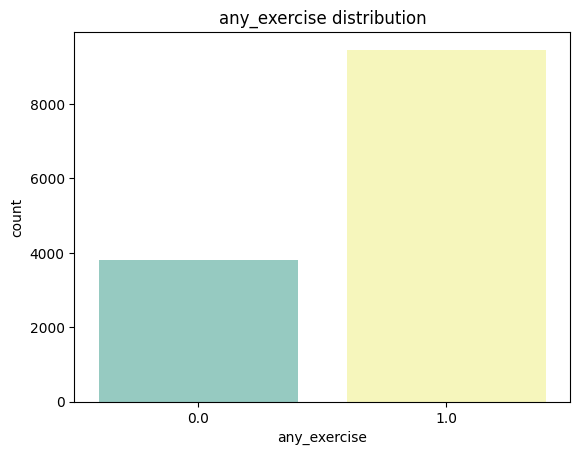

/tmp/ipython-input-1046154591.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


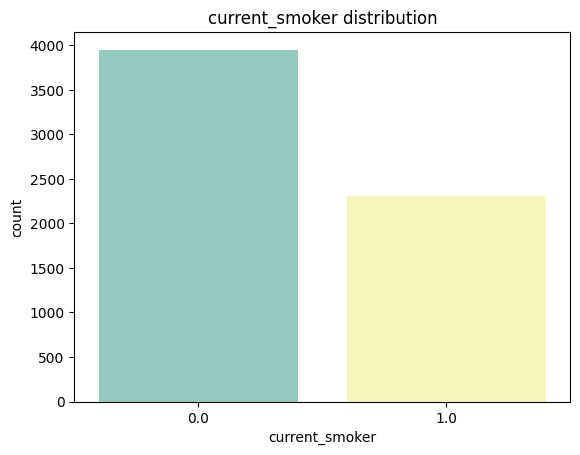

/tmp/ipython-input-1046154591.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


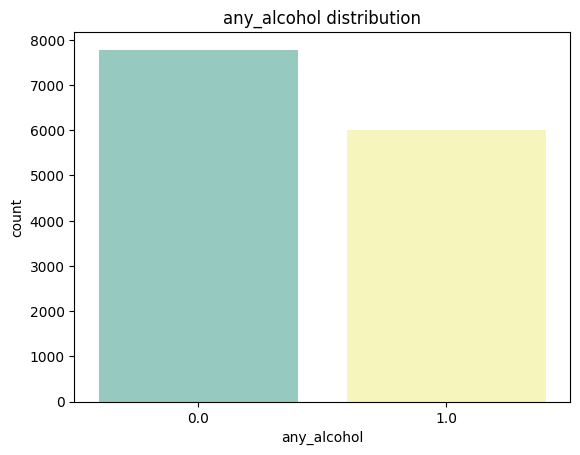

In [ ]:
# =========================
# Step 3 — Lifestyle factors
# =========================

for col in ["any_exercise", "current_smoker", "any_alcohol"]:
    if col in df.columns:
        sns.countplot(x=col, data=df, palette="Set3")
        plt.title(f"{col} distribution")
        plt.show()


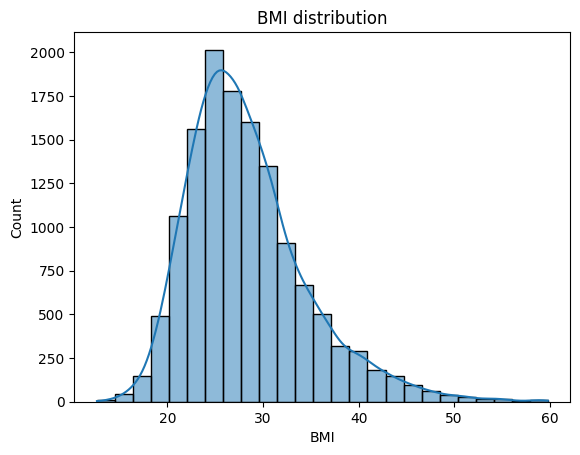

/tmp/ipython-input-628398440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes_dx", y="BMI", data=df, palette="Set2")


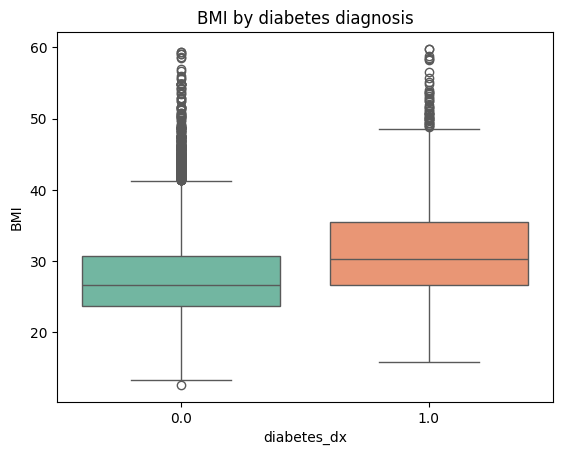

In [ ]:
# =========================
# Step 4 — Continuous health variables
# =========================

if "BMI" in df.columns:
    sns.histplot(df["BMI"].dropna(), bins=25, kde=True)
    plt.title("BMI distribution")
    plt.xlabel("BMI")
    plt.show()

    # BMI by diabetes status
    if "diabetes_dx" in df.columns:
        sns.boxplot(x="diabetes_dx", y="BMI", data=df, palette="Set2")
        plt.title("BMI by diabetes diagnosis")
        plt.show()


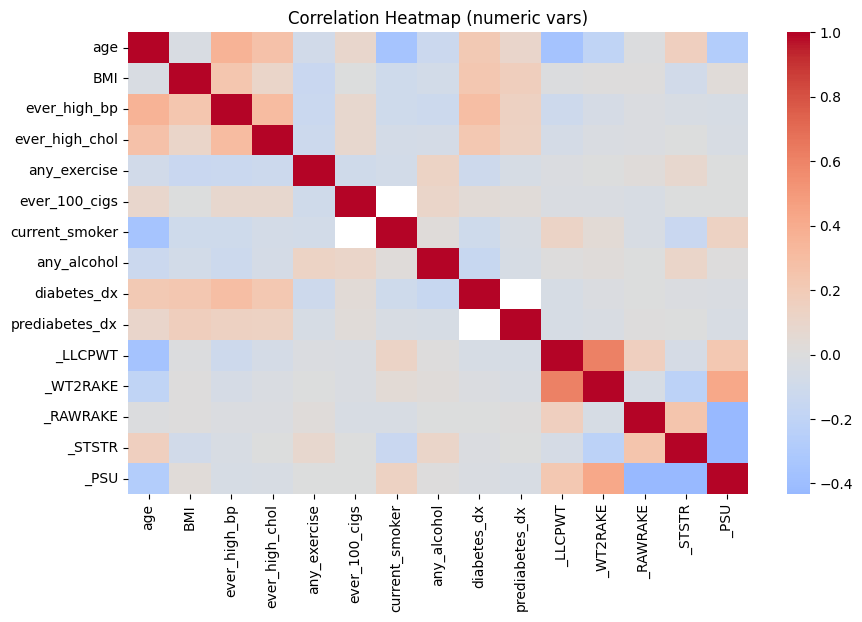

In [ ]:
# =========================
# Step 6 — Correlation heatmap
# =========================

# Only keep numeric columns for correlation
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (numeric vars)")
plt.show()


WEIGHTED EDA

In [ ]:
# Confirm weight column exists
if "_LLCPWT" not in df.columns:
    raise ValueError("Weight column `_LLCPWT` not found in dataset!")


In [ ]:

# Assuming `df` has a column "Age" with continuous values in years
# Create age groups (similar to BRFSS style bins)
bins = [17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, np.inf]
labels = ["18-24", "25-29", "30-34", "35-39", "40-44",
          "45-49", "50-54", "55-59", "60-64",
          "65-69", "70-74", "75-79", "80+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)

# Quick check
print(df["age_group"].value_counts())

age_group
60-64    1775
65-69    1738
55-59    1576
50-54    1410
70-74    1331
80+      1143
45-49    1049
40-44     837
35-39     818
18-24     743
75-79     728
30-34     689
25-29     623
Name: count, dtype: int64


In [ ]:
print(df.columns)

Index(['age', 'sex', 'education', 'income', 'employment', 'BMI', 'BMI_cat',
       'ever_high_bp', 'ever_high_chol', 'any_exercise', 'ever_100_cigs',
       'current_smoker', 'any_alcohol', 'diabetes_dx', 'prediabetes_dx',
       '_LLCPWT', '_WT2RAKE', '_RAWRAKE', '_STSTR', '_PSU', 'ageGroup',
       'age_group'],
      dtype='object')


In [ ]:
# Example 1: Weighted mean BMI
# -------------------------------
weighted_mean_bmi = np.average(df["BMI"].dropna(), weights=df.loc[df["BMI"].notna(), "_LLCPWT"])
unweighted_mean_bmi = df["BMI"].mean()

print("Unweighted mean BMI:", round(unweighted_mean_bmi, 2))
print("Weighted mean BMI:", round(weighted_mean_bmi, 2))

Unweighted mean BMI: 28.34
Weighted mean BMI: 28.28


In [ ]:
# Example 2: Weighted age distribution
# -------------------------------
# Use _AGEG5YR (age grouped by 5 years) as categorical
age_counts_unweighted = df["age_group"].value_counts(normalize=True).sort_index()
age_counts_weighted = (
    df.groupby("age_group")["_LLCPWT"].sum() / df["_LLCPWT"].sum()
)


/tmp/ipython-input-2162320566.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["_LLCPWT"].sum() / df["_LLCPWT"].sum()


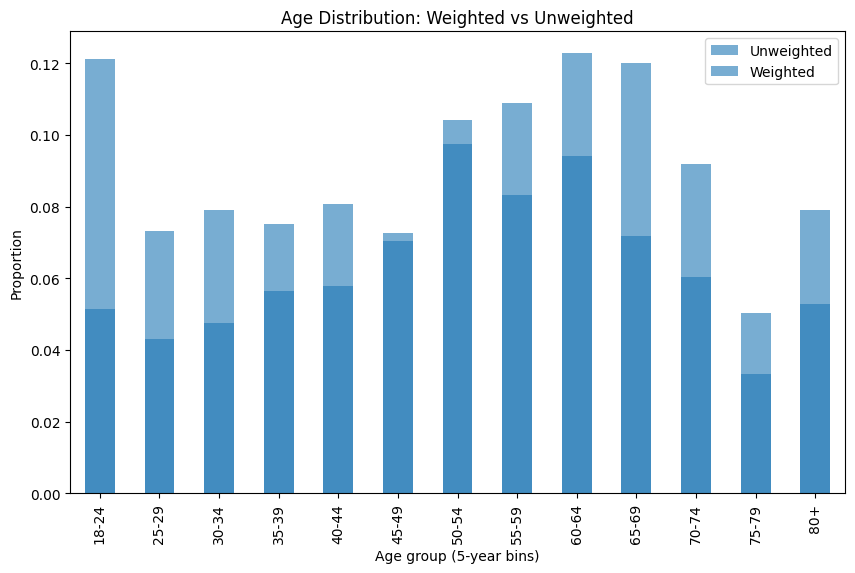

In [ ]:
# Plot comparison
plt.figure(figsize=(10,6))
age_counts_unweighted.plot(kind="bar", alpha=0.6, label="Unweighted")
age_counts_weighted.plot(kind="bar", alpha=0.6, label="Weighted")
plt.title("Age Distribution: Weighted vs Unweighted")
plt.xlabel("Age group (5-year bins)")
plt.ylabel("Proportion")
plt.legend()
plt.show()

In [ ]:
# Example 3: Weighted sex breakdown
# -------------------------------
sex_map = {1:"Male", 2:"Female"}
df["sex"] = df["sex"].map(sex_map)

# Drop rows with NaN in sex or _LLCPWT for weighted calculation
df_sex_weighted = df.dropna(subset=["sex", "_LLCPWT"])

sex_unweighted = df_sex_weighted["sex"].value_counts(normalize=True)
sex_weighted = (
    df_sex_weighted.groupby("sex")["_LLCPWT"].sum() / df_sex_weighted["_LLCPWT"].sum()
)

In [ ]:
# Example 3: Weighted sex breakdown
# -------------------------------
sex_map = {1:"Male", 2:"Female"}
df["sex"] = df["_SEX"].map(sex_map)

sex_unweighted = df["sex"].value_counts(normalize=True)
sex_weighted = (
    df.groupby("sex")["_LLCPWT"].sum() / df["_LLCPWT"].sum()
)

In [ ]:
# Plot comparison
plt.figure(figsize=(6,4))
pd.DataFrame({"Unweighted": sex_unweighted, "Weighted": sex_weighted}).plot(kind="bar")
plt.title("Sex Distribution: Weighted vs Unweighted")
plt.ylabel("Proportion")
plt.show()


In [ ]:
# Example 4: Weighted vs Unweighted Diabetes Prevalence
# -------------------------------
# DIABETE3: Ever told by doctor you have diabetes
# (1=Yes, 2=No, 3=Borderline, 4=During pregnancy, 7/9=Missing)
diabetes_map = {0:"No", 1:"Yes"} # Updated map based on diabetes_dx column
df["diabetes"] = df["diabetes_dx"].map(diabetes_map)

diab_unweighted = df["diabetes"].value_counts(normalize=True)
diab_weighted = (
    df.groupby("diabetes")["_LLCPWT"].sum() / df["_LLCPWT"].sum()
)

<Figure size 600x400 with 0 Axes>

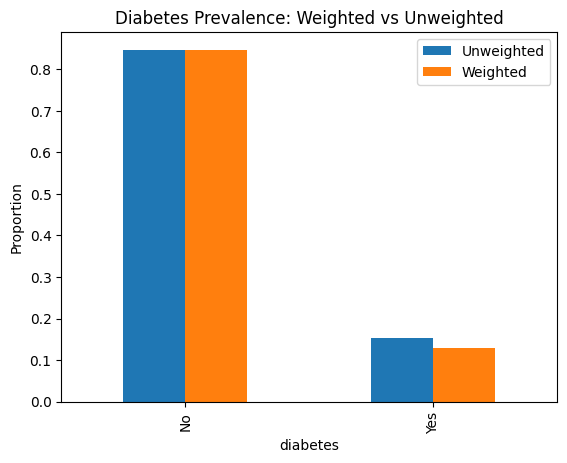

In [ ]:
plt.figure(figsize=(6,4))
pd.DataFrame({"Unweighted": diab_unweighted, "Weighted": diab_weighted}).plot(kind="bar")
plt.title("Diabetes Prevalence: Weighted vs Unweighted")
plt.ylabel("Proportion")
plt.show()

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             14460 non-null  float64 
 1   sex             0 non-null      object  
 2   education       14406 non-null  object  
 3   income          6454 non-null   object  
 4   employment      8428 non-null   object  
 5   BMI             13344 non-null  float64 
 6   BMI_cat         13357 non-null  object  
 7   ever_high_bp    14098 non-null  float64 
 8   ever_high_chol  12363 non-null  float64 
 9   any_exercise    13271 non-null  float64 
 10  ever_100_cigs   13966 non-null  float64 
 11  current_smoker  6258 non-null   float64 
 12  any_alcohol     13785 non-null  float64 
 13  diabetes_dx     14077 non-null  float64 
 14  prediabetes_dx  9566 non-null   float64 
 15  _LLCPWT         14460 non-null  float64 
 16  _WT2RAKE        14460 non-null  float64 
 17  _RAWRAKE    

In [ ]:
df.head()

,age,sex,education,income,employment,BMI,BMI_cat,ever_high_bp,ever_high_chol,any_exercise,...,diabetes_dx,prediabetes_dx,_LLCPWT,_WT2RAKE,_RAWRAKE,_STSTR,_PSU,ageGroup,age_group,diabetes
0,63.0,NaN,HS/GED,$15–20k,NaN,40.18,Obese,1.0,1.0,0.0,...,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09,60-64,60-64,No
1,52.0,NaN,College 4+,<$10k,Out of work >1y,25.09,Overweight,0.0,0.0,1.0,...,0.0,0.0,108.060903,28.781560,1.0,11011.0,2.015000e+09,50-54,50-54,No
2,71.0,NaN,HS/GED,NaN,NaN,22.04,Normal,0.0,1.0,NaN,...,0.0,0.0,255.264797,57.563120,2.0,11011.0,2.015000e+09,70-74,70-74,No
3,63.0,NaN,HS/GED,NaN,NaN,28.19,Overweight,1.0,1.0,0.0,...,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09,60-64,60-64,No
4,61.0,NaN,Some college,NaN,NaN,24.37,Normal,0.0,0.0,0.0,...,0.0,0.0,258.682223,57.563120,2.0,11011.0,2.015000e+09,60-64,60-64,No
